In [1]:
!pip install fastai --upgrade

Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (2.1.7)


In [2]:
import fastai
fastai.__version__

'2.1.7'

In [3]:
# install the dependencies
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permissions
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download -d mateuszbuda/lgg-mri-segmentation

 97% 689M/714M [00:12<00:00, 51.0MB/s]
100% 714M/714M [00:12<00:00, 57.7MB/s]


In [7]:
from zipfile import ZipFile
file_name = 'lgg-mri-segmentation.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [3]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision.all import *
from fastai.callback.hook import *

In [9]:
save_path = 'saved_model'

In [10]:
get_mask_path = lambda x : x.parents[0] / (x.stem + '_mask' + x.suffix)

In [11]:
data_path = Path('/content/lgg-mri-segmentation/kaggle_3m')
smalldata_path = data_path / 'TCGA_CS_4941_19960909'

In [12]:
smalldata_path.ls()

(#46) [Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_21_mask.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_9_mask.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_10.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_17.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_14.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_5.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_8.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_11_mask.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_8_mask.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960

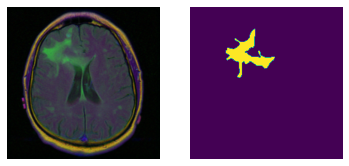

In [13]:
sample_imgfile_path = smalldata_path/'TCGA_CS_4941_19960909_15.tif'
img = Image.open(sample_imgfile_path)
sample_maskfile_path = get_mask_path(sample_imgfile_path)
mask = Image.open(sample_maskfile_path)
show_images((img, mask))

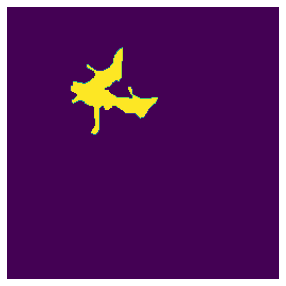

In [14]:
show_image(mask, alpha=1)

In [15]:
mask_t = cast(mask, TensorMask)
src_size = np.array(mask_t.shape)
src_size, mask_t.data

(array([256, 256]), TensorMask([[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]], dtype=torch.uint8))

In [16]:
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import gc
import humanize
import os
import GPUtil as GPU
import psutil

  Created wheel for gputil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=0446366575dc5251e9afe05b3cb34b73393e14a3ec199b202e7da65398732d75
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
Successfully built gputil


In [17]:
GPUs = GPU.getGPUs()
gpu = GPUs[0]
# XXX: only one GPU on Colab and isn’t guaranteed
def printm():
 process = psutil.Process(os.getpid())
 gc.collect()
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()

Gen RAM Free: 12.7 GB  | Proc size: 325.0 MB
GPU RAM Free: 15069MB | Used: 10MB | Util   0% | Total 15079MB


In [18]:
bs = 8
splitter = FuncSplitter(lambda posix_path: '_mask' in posix_path.name)
fnames = get_image_files(data_path)
images, masks = splitter(fnames)
images, masks = fnames[images], fnames[masks]
images, masks

((#3929) [Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_6.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_22.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_17.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_8.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_18.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_13.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_11.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_25.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_16.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_2.tif')...]

In [19]:
codes = ['n', 'y']

In [20]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1,p=0.25), Normalize.from_stats(*imagenet_stats)]

In [21]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, item_tfms=[Resize(src_size//2, method=ResizeMethod.Squish)], batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

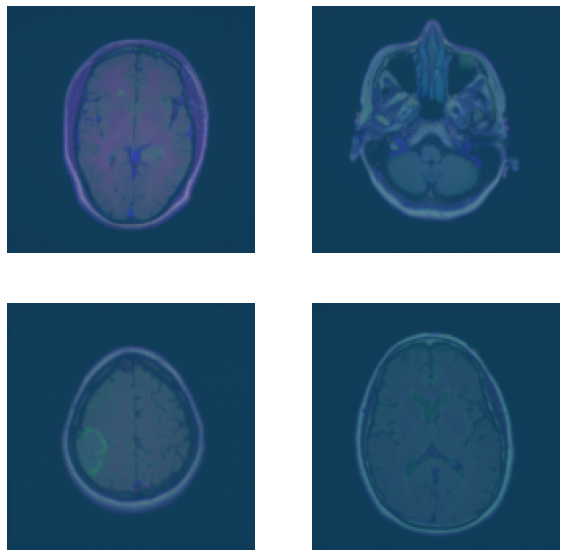

In [22]:
dls.show_batch(max_n=4, figsize=(10, 10))

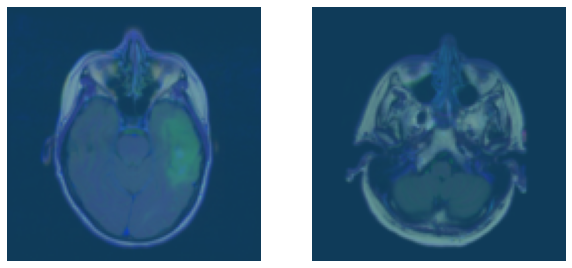

In [23]:
dls.valid.show_batch(max_n=2, figsize=(10, 10))

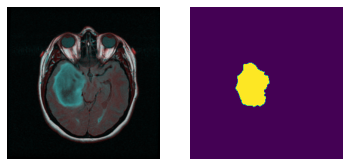

In [24]:
show_images(dls.train_ds[2])

In [25]:
t_mask = cast(dls.train_ds[2][1], TensorMask)
t_mask.argmax(dim=1)

TensorMask([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  98,  96,  90,
         89,  89,  89,  89,  89,  89,  89,  89,  89,  89,  88,  87,  87,  86,
         85,  84,  83,  82,  80,  79,  79,  79,  79,  79,  80,  80,  80,  80,
         80,  80,  79,  79,  79,  78,  78,  78,  77,  77,  76,  76,  76,  77,
         78,  78,  80,  80,  80,  81,  81,  82,  82,  82,  83,  83,  83,  84,
         84,  84,  85,  86,  86,  86,  86,  87,  87,  88,  89,  93,  95, 105,
        106,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## Model

In [31]:
def acc_brain(input, target):
  target = target.squeeze(1)
  return (TensorBase(input.argmax(dim=1)) == TensorBase(target)).float().mean()

In [34]:
from fastai.vision.models import resnet34

learn = unet_learner(dls, resnet34, metrics=acc_brain, path=save_path)

SuggestedLRs(lr_min=0.002290867641568184, lr_steep=3.0199516913853586e-05)

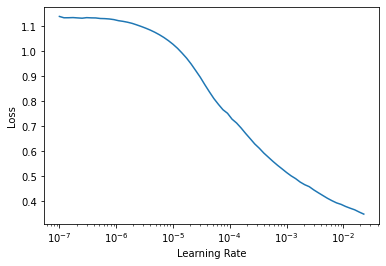

In [35]:
learn.lr_find()

In [36]:
lr = 1e-4

In [37]:
learn.fit_one_cycle(10, slice(lr)) # Because of a fastai's bug, I cannot use Dice for now: https://github.com/fastai/fastai/issues/3041

epoch,train_loss,valid_loss,acc_brain,time
0,0.024597,0.020008,0.993170,00:56
1,0.016114,0.015731,0.994522,00:57
2,0.011044,0.015927,0.993965,00:58
3,0.007361,0.008180,0.997054,00:58
4,0.006645,0.007840,0.997128,00:59
5,0.005439,0.006775,0.997489,00:59
6,0.004536,0.006355,0.997626,00:59
7,0.004144,0.006228,0.997656,00:59
8,0.003983,0.006322,0.997690,00:59
9,0.003830,0.006554,0.997646,00:59


In [38]:
learn.save('stage-1')

Path('saved_model/models/stage-1.pth')

In [159]:
learn.load('stage-1')

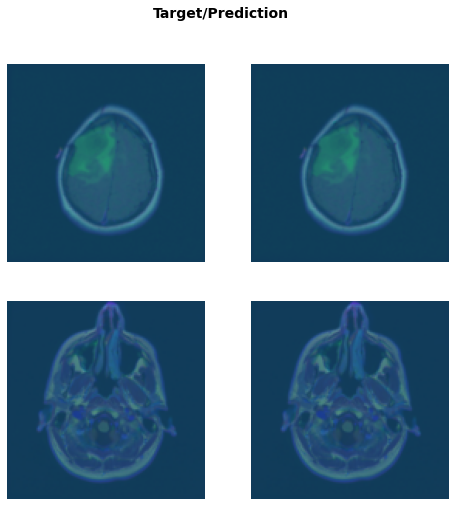

In [161]:
learn.show_results(max_n=8, figsize=(8,8))

In [162]:
learn.unfreeze()

In [163]:
lrs = slice(lr/400, lr/4)

In [164]:
learn.fit_one_cycle(12, lrs, pct_start=0.1)

epoch,train_loss,valid_loss,acc_brain,time
0,0.003994,0.006375,0.997677,01:05
1,0.004169,0.006293,0.997726,01:05
2,0.003586,0.006401,0.997703,01:05
3,0.003577,0.006300,0.997730,01:05
4,0.003304,0.006394,0.997691,01:05
5,0.003186,0.006864,0.997674,01:05
6,0.003378,0.006450,0.997737,01:05
7,0.003138,0.006588,0.997744,01:04
8,0.002851,0.006334,0.997774,01:05
9,0.002901,0.006672,0.997729,01:05


In [165]:
learn.save('stage-2')

Path('saved_model/models/stage-2.pth')

### Full size

At this point, it is recommended to restart the kernel

In [ ]:
!pip install fastai --upgrade

In [6]:
import fastai
fastai.__version__

'2.1.7'

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision.all import *
from fastai.callback.hook import *

In [8]:
def acc_brain(input, target):
  target = target.squeeze(1)
  return (TensorBase(input.argmax(dim=1)) == TensorBase(target)).float().mean()

In [9]:
get_mask_path = lambda x : x.parents[0] / (x.stem + '_mask' + x.suffix)

In [10]:
bs = 4
codes = ['n', 'y']

In [11]:
data_path = Path('/content/lgg-mri-segmentation/kaggle_3m')

In [14]:
splitter = FuncSplitter(lambda posix_path: '_mask' in posix_path.name)
fnames = get_image_files(data_path)
images, masks = splitter(fnames)
images, masks = fnames[images], fnames[masks]
images, masks

((#3929) [Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_6.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_22.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_17.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_8.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_18.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_13.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_11.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_25.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_16.tif'),Path('/content/lgg-mri-segmentation/kaggle_3m/TCGA_DU_7008_19830723/TCGA_DU_7008_19830723_2.tif')...]

In [12]:
tfms = [IntToFloatTensor(div_mask=255), Brightness(0.1, p=0.25), Zoom(max_zoom=1.1,p=0.25), Normalize.from_stats(*imagenet_stats)]

In [15]:
dls = SegmentationDataLoaders.from_label_func(data_path, images, get_mask_path, batch_tfms=tfms, valid_pct=0.2, codes=codes, seed=42, bs=bs)

In [17]:
save_path = 'saved_model'

In [18]:
from fastai.vision.models import resnet34

learn = unet_learner(dls, resnet34, metrics=acc_brain, path=save_path)

In [19]:
learn.load('stage-2')

SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=9.12010818865383e-07)

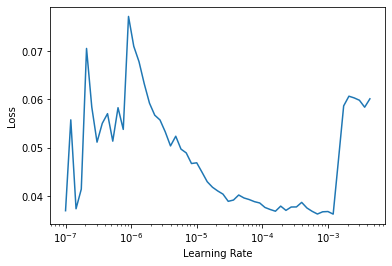

In [20]:
learn.lr_find()

In [21]:
lr = 1e-4

In [22]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.5)

epoch,train_loss,valid_loss,acc_brain,time
0,0.011109,0.011490,0.995944,03:06
1,0.008147,0.010876,0.996540,03:04
2,0.007214,0.008088,0.997039,03:04
3,0.006790,0.007471,0.997159,03:03
4,0.006096,0.008698,0.996817,03:03
5,0.004791,0.006760,0.997495,03:03
6,0.004365,0.007141,0.997564,03:03
7,0.003851,0.005874,0.997831,03:03
8,0.003296,0.006460,0.997859,03:03
9,0.002888,0.006331,0.997886,03:03


In [23]:
learn.save('stage-1-big')

Path('saved_model/models/stage-1-big.pth')

In [24]:
learn.load('stage-1-big')

In [25]:
learn.unfreeze()

In [26]:
lrs = slice(1e-6, lr/10)

In [27]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_brain,time
0,0.003372,0.006302,0.997890,03:20
1,0.002706,0.006323,0.997902,03:19
2,0.002557,0.006674,0.997844,03:19
3,0.002796,0.006527,0.997865,03:20
4,0.002818,0.006563,0.997893,03:19
5,0.002029,0.006685,0.997894,03:20
6,0.002631,0.006740,0.997880,03:20
7,0.002637,0.006638,0.997890,03:20
8,0.002437,0.006764,0.997895,03:20
9,0.002729,0.006706,0.997900,03:19


In [28]:
learn.save('stage-2-big')

Path('saved_model/models/stage-2-big.pth')

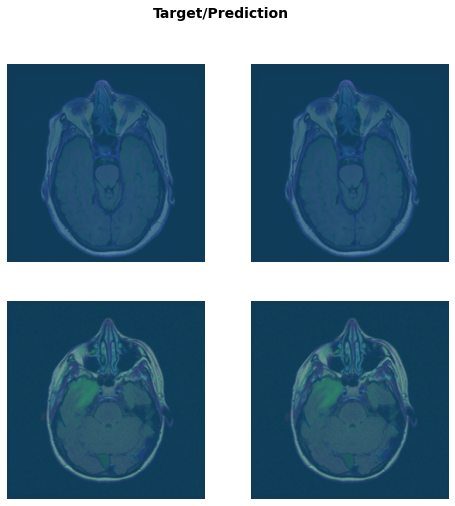

In [32]:
learn.show_results(figsize=(8, 8))